<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/03_pytorch_computer_vision_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

1.13.1
0.14.1


In [2]:
MY_IDX = 3

In [3]:
# Training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

# Testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Download and extract
# http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
# http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz

# This doin me a concern...

In [14]:
type(test_data[0])

tuple

In [15]:
type(test_data[0][:10])

tuple

In [18]:
img, label = test_data[0][:10]
type(img), img.shape, label

(torch.Tensor, torch.Size([1, 28, 28]), 9)

In [9]:
# This is the first thing I found inside img, before the first comma.
len([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000])

28

So how is `test_data[0][:10]` just one element?  It not gettin the first 10 of nuttin!

## Yeah, you're right.

In [27]:
A, B = test_data[0]
# A, B

In [33]:
assert(test_data[0] == test_data[0][:10])

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [35]:
# print(A == img, B == label)  # Image is all True.
B == label

True

# Moving on!

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
class_names = train_data.classes

class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx

class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
# Image shape
image, label = train_data[MY_IDX]

print(f"\nImage shape: {image.shape} -> [color_channels, height, width]") 
print(f"\nImage label: {class_names[label]}")


Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]

Image label: Dress


In [8]:
type(train_data[MY_IDX])

tuple

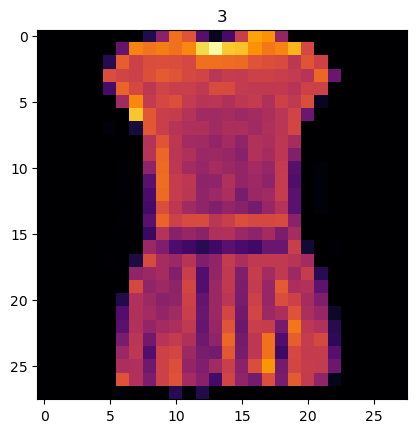

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[MY_IDX]
plt.imshow(image.squeeze(), cmap="inferno")
plt.title(label);

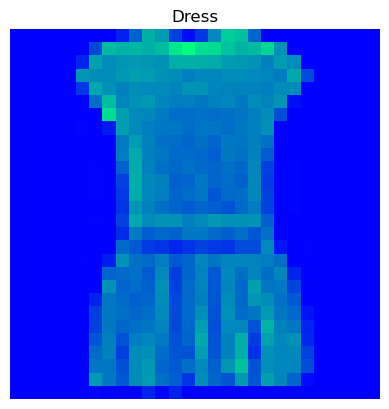

In [10]:
plt.imshow(image.squeeze(), cmap="winter")
plt.title(class_names[label])
plt.axis(False);

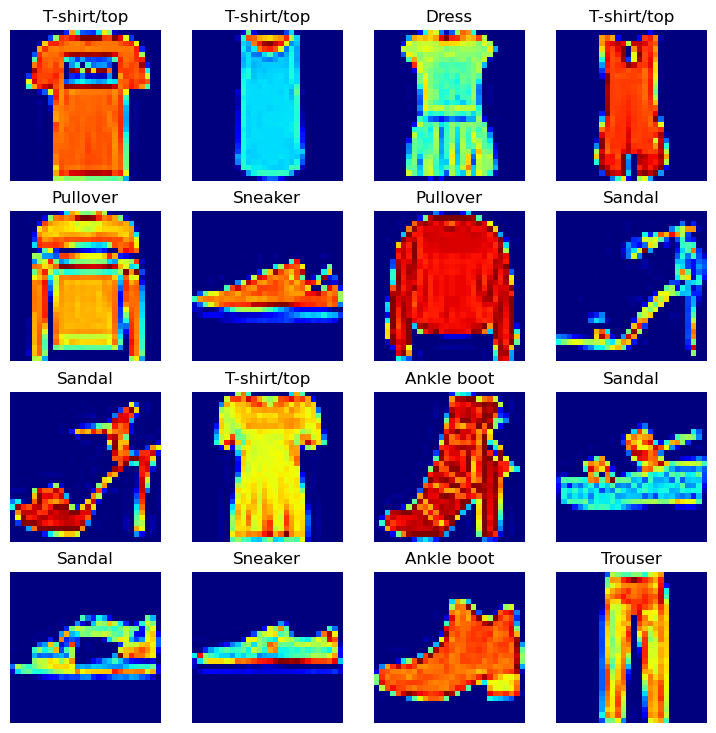

In [11]:
# Hello, images!
torch.manual_seed(42)
rows, cols = 4, 4
fig = plt.figure(figsize=(9, 9))  # This is the actual window size.
# fig = plt.figure(figsize=(rows, cols))  # <- This one - Too small!

# Hey - what if I don't want a random image?
# for i in range(1, rows * cols + 1):
#   random_idx = torch.randint(0, len(train_data), size=[1]).item()
#   img, label = train_data[random_idx]
#   fig.add_subplot(rows, cols, i)
#   plt.imshow(img.squeeze(), cmap="jet")
#   plt.title(class_names[label])
#   plt.axis(False)

for i in range(1, rows * cols + 1):
  img, label = train_data[i]
  fig.add_subplot(rows, cols, i)  # This is how you make a grid in matplotlib.
  plt.imshow(img.squeeze(), cmap="jet")  # Squeeze, bc we only want [28, 28]; not [1, 28, 28].
  plt.title(class_names[label])
  plt.axis(False)


In [12]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [13]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [14]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

# Data Loaders

In [15]:
from torch.utils.data import DataLoader

# Batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [16]:
type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [17]:
test_dataloader

## Both data loaders

In [18]:
# Let's check out the data loaders
print(f"\nLength of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"\nLength of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

60000 / 32, 10000 / 32


Length of train_dataloader: 1875 batches of 32...

Length of test_dataloader: 313 batches of 32...


(1875.0, 312.5)

## Training dataloader

In [19]:
# Check out the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# batches, channels, width, height  # label size = num batches; 1:1
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## What is all this fluff?

In [20]:
# TRAIN. FEATURES. BATCH. is one batch of features (images).
type(train_features_batch), len(train_features_batch)

(torch.Tensor, 32)

In [21]:
# PICK ONE FEATURE OUT OF THE BOX.
img = train_features_batch[0]
type(img), len(img)

(torch.Tensor, 1)

In [22]:
# PICK ONE LABEL OUT OF THE BOX.
lab = train_labels_batch[0]
type(lab), lab

(torch.Tensor, tensor(5))

In [23]:
# RANDINT WITHOUT ITEM()
torch.randint(0, len(train_features_batch), size=[1])

tensor([10])

In [24]:
# RANDINT WITH ITEM()
torch.randint(0, len(train_features_batch), size=[1]).item()

7

## Matplotlib one image


Image size: torch.Size([1, 28, 28])

Label: 9, label size: torch.Size([])


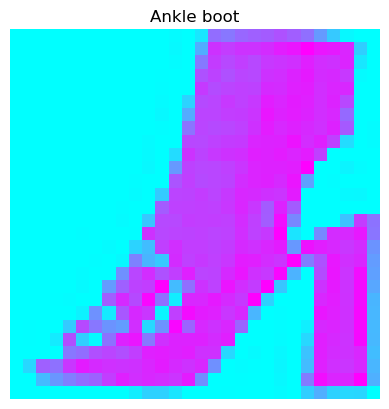

In [25]:
# Display one random(ish) feature
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="cool")
plt.title(class_names[label])
plt.axis(False)

print(f"\nImage size: {img.shape}")  # It's a single image; so no batch dimension.
print(f"\nLabel: {label}, label size: {label.shape}")

In [27]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)  # perform forward pass

# Print out what happened
print(f"\nShape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")



Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [28]:
28 * 28

784